## **Лабораторная работа 1**

### Задание 1

Проделать все представленные вычисления используя другой набор данных - файл **births.csv**

Следующие задания смотрите по тексту работы

_____________

Импортируем базовый набор библиотек:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные  и выводим первые 5 строк

In [11]:
births = pd.read_csv("births.csv")
births.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Делаем поле даты индексным и снова выводим первые 5 строе для контроля результата

In [12]:
births.set_index('Date', inplace = True)
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Преобразуем наше индексное поле в правильный формат datetime 

In [13]:
births.index = pd.to_datetime(births.index)

In [14]:
births.index[:5]

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

**Обратите внимание** - можно все сделать сразу в момент загрузки 

    passengers = pd.read_csv('passengers.csv', index_col = 'Month', parse_dates = True

в качестве примера преобразования данных выведем 5 строк средних данных за год

In [16]:
births.resample(rule = 'AS').mean().head()

,Births
Date,
1959-01-01,41.980822


теперь посмотрим как в Pandas  реализовано скользыщее среднее.

In [17]:
births.rolling(window = 3).mean().head()

,Births
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000


Базовый вариант отрисовки данных с помощью Pandas

<AxesSubplot:xlabel='Date'>

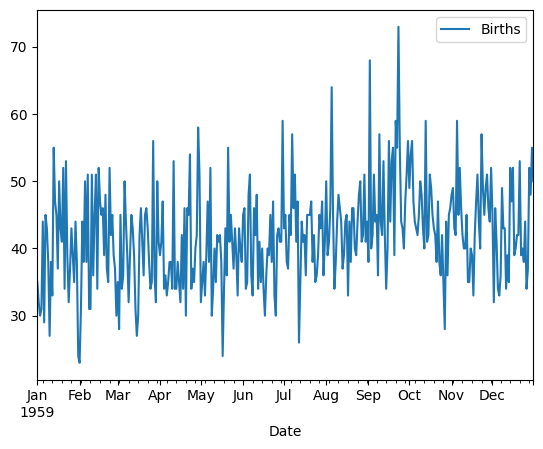

In [18]:
births.plot()

А теперь тоже самое но в расширенном варианте 

[Text(0.5, 1.0, 'Динамика рождаемости за 1959 год'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество рождённых')]

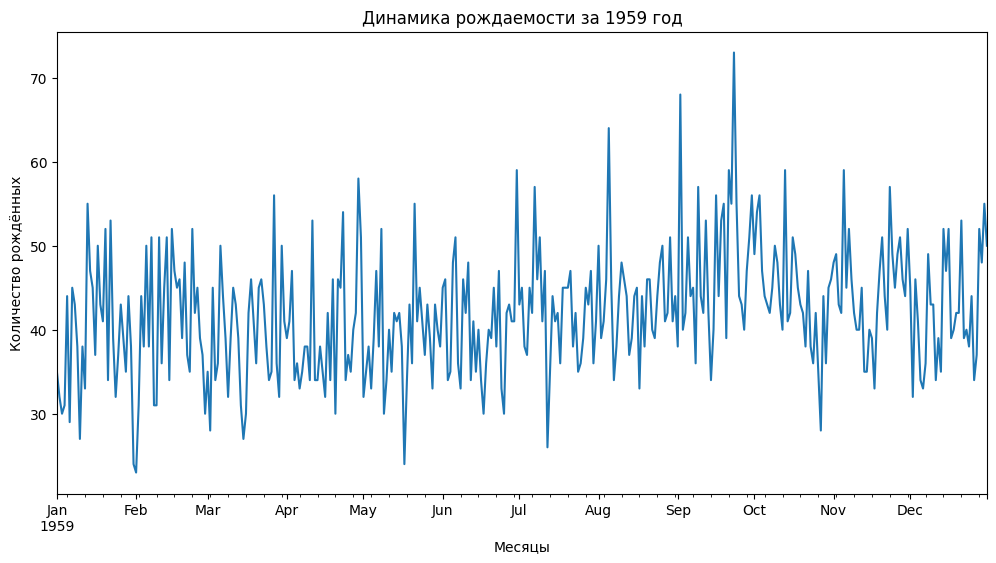

In [19]:
ax = births.plot(figsize = (12,6), legend = None)
ax.set(title = 'Динамика рождаемости за 1959 год', xlabel = 'Месяцы', ylabel = 'Количество рождённых')

________________
### Задание 2

Написать собственную функцию на языке Python вычисляющую экспотенциальное скользящее среднее и отрисовать ее на графике данных
с использованием Matplotlib. Сравнить с простым слоьзящим средним , сделать письменный вывод
_______________

Код ниже демонстрирует отрисовку данных а также 2 вариантов скользящего среднего используя Matplotlib

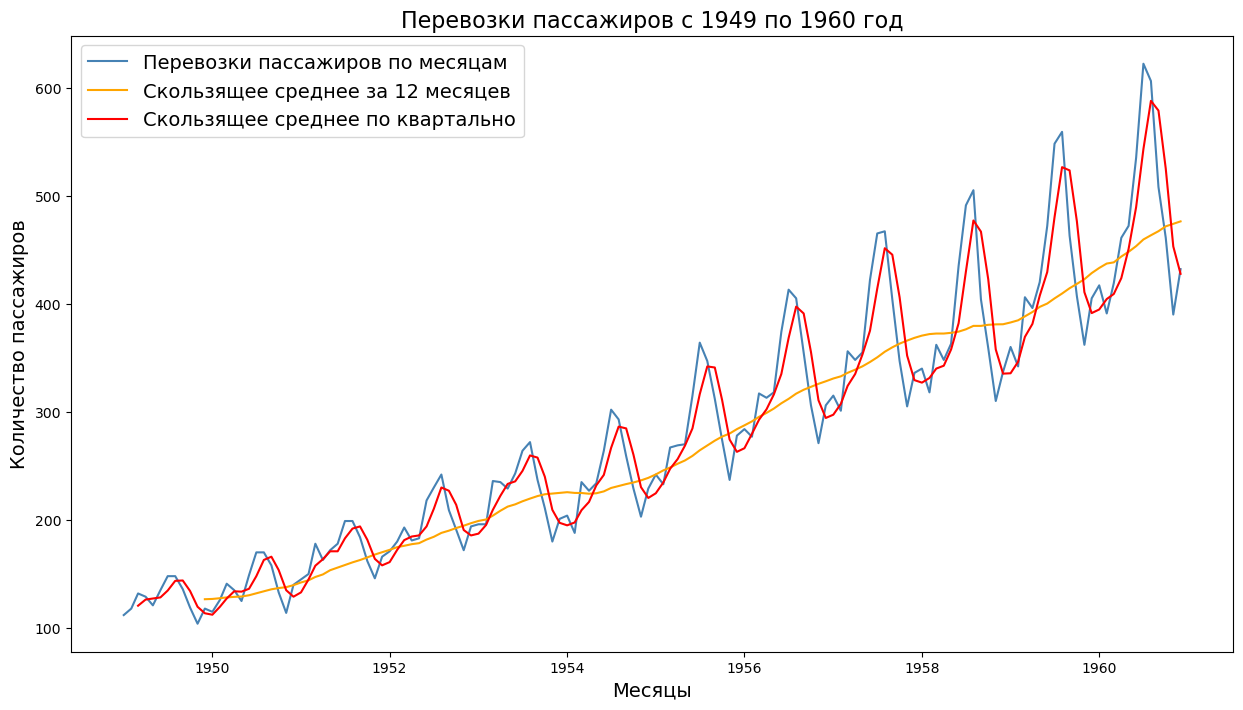

In [10]:
plt.figure(figsize = (15,8))
 
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
plt.plot(passengers.rolling(window = 3).mean(), label = 'Скользящее среднее по квартально', color = 'red')

plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)
 
plt.show()

Импортируем библиотеку statsmodels для статистического анализа временного ряда

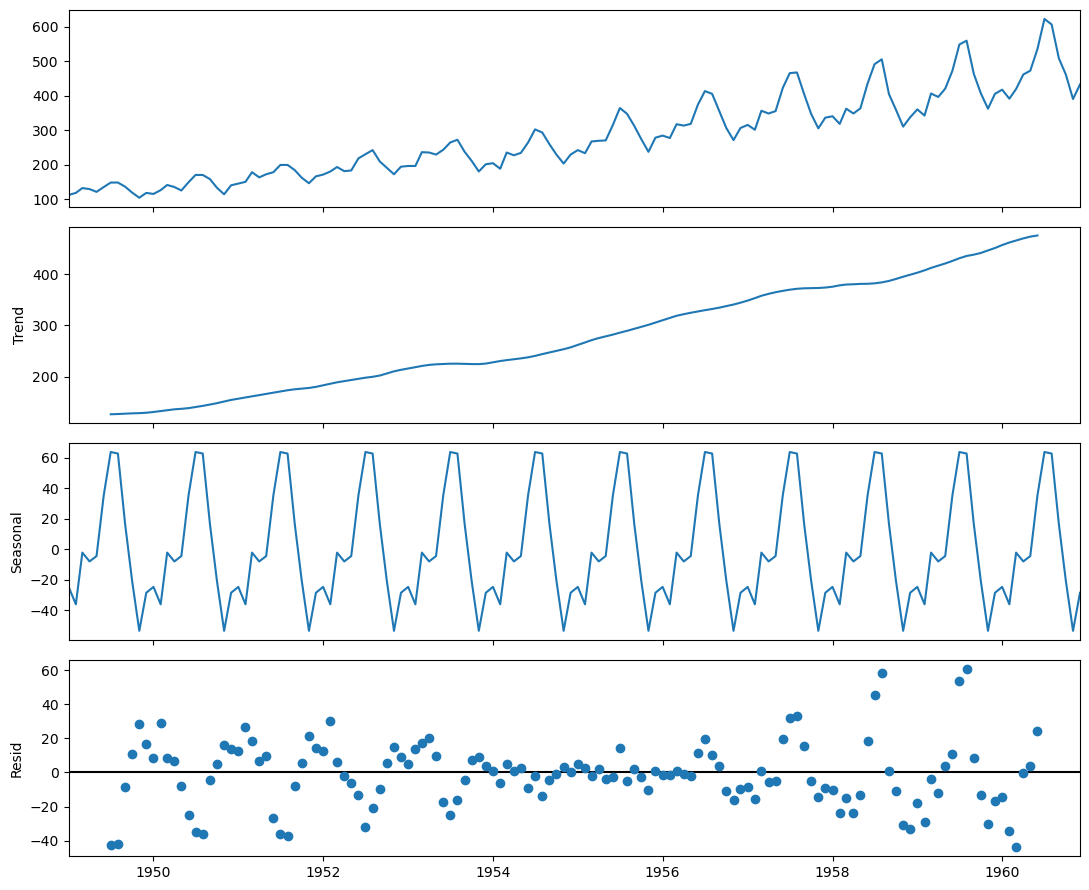

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
decompose = seasonal_decompose(passengers)
decompose.plot()
 
plt.show()

Проведем тест Дика-Фуллера

In [12]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(passengers['#Passengers'])
 
print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


______________________
### Задание 3

Сделать письменный вывод о временном ряде в новом датасете на основе проведенного анализа

**Внимание!** Ваша работа должна содержать работу только с новым набором данных
_________________________
